# 저자 github
https://github.com/rickiepark/hg-mldl

# 지도학습의 종류
## 분류(classification)
* 미리 정의된 여러 클래스 레이블(class label) 중 하나를 예측
* 이진(binary)분류와 다중(multiclass)분류로 구분
* 이진분류 -답이 예/아니오만 나오는 것
* 다중분류 - 셋이상의 클래스로 분류
## 회귀(regression)
* 연속적인 값(실수)을 예측

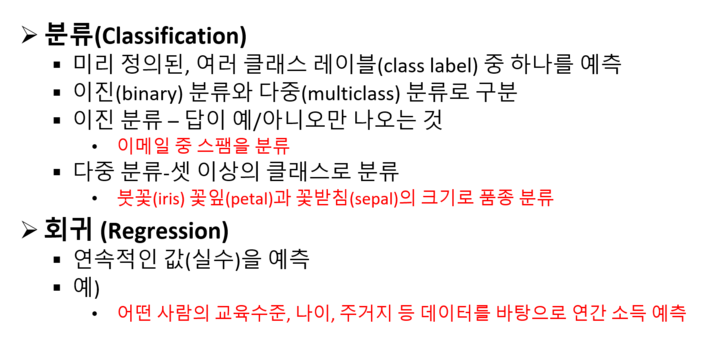

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

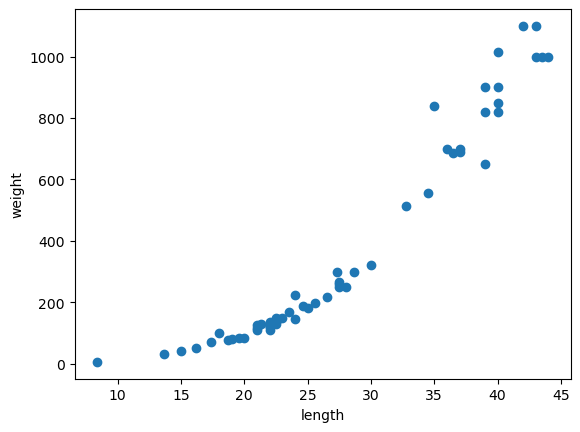

In [4]:
#회귀일 경우 대부분 임의의 숫자이므로 특성 하나만 사용, 타겟값 perch_weight를 y로 둠
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
perch_length, perch_weight, random_state = 42)

In [10]:
print(len(perch_length))    # 75% : 25% 

56


In [9]:
print(train_input.shape, test_input.shape)

(42,) (14,)


In [11]:
test_array = np.array([1,2,3,4])
print(test_array)
print(test_array.shape)

[1 2 3 4]
(4,)


In [12]:
test_array = test_array.reshape(2,2)     #2행 2열로 바꿔줘
print(test_array)
print(test_array.shape)

[[1 2]
 [3 4]]
(2, 2)


In [14]:
# 아래 코드의 주석을 제거하고 실행하면 에러가 발생합니다.
#test_array = test_array.reshape(2,3)

In [16]:
train_input = train_input.reshape(-1,1)     # reshape(-1,1)은 행을 신경쓰지 않겟다. 열만 1열로 바꿔줘 의미
test_input = test_input.reshape(-1,1)

In [17]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [19]:
train_input = train_input.reshape(-1, 1)
print(train_input[:3])
print('________________')
test_input = test_input.reshape(-1, 1)
print(test_input[:3])

[[19.6]
 [22. ]
 [18.7]]
________________
[[ 8.4]
 [18. ]
 [27.5]]


In [20]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


# 결정 계수($R^2$)
$R^2 = 1-\cfrac{(타깃 - 예측)^2}{(타깃-평균)^2}$

R square 가 예측을 잘 할수록 문자가 0이 되므로 $R^2$가 1에 가까워진다

In [23]:
from sklearn.neighbors import KNeighborsRegressor

In [24]:
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [25]:
# 분류일 때는 score, 회귀는 측정 도구가 달라야한다. 
knr.score(test_input, test_target)

0.992809406101064

In [26]:
from sklearn.metrics import mean_absolute_error

In [27]:
#테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)
#테스트 세트에 대한 평균 절댓값 오차를 계산합니다. 
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


# 과대적합 vs 과소적합
## 과대적합(overfitting)
* 너무 복잡한 모델을 만들어 훈련 세트에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려운 경우
## 과소적합(underfittin)
* 너무 간단한 모델을 만들어 데이터의 다양성을 잡아내지 못하는 경우
### 데이터의 양이 일정이상을 넘어가면 규제가 의미없을정도로 정확하게 나온다. 

In [29]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [31]:
# 이웃의 갯수를 3으로 설정합니다. 
knr.n_neighbors = 3
# 몯ㄹ을 다시 훈련합니다. 
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [32]:
print(knr.score(test_input, test_target))

0.9746459963987609


# 확인문제

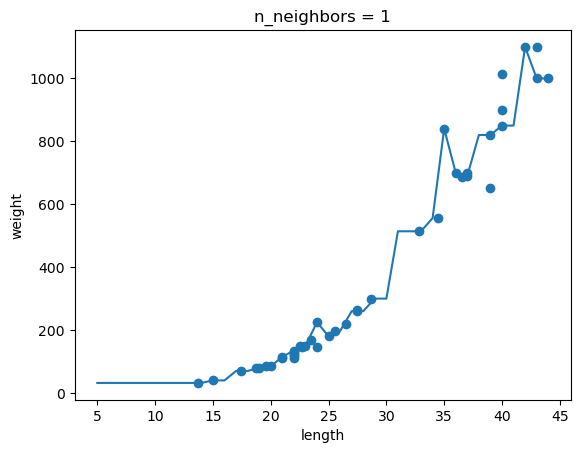

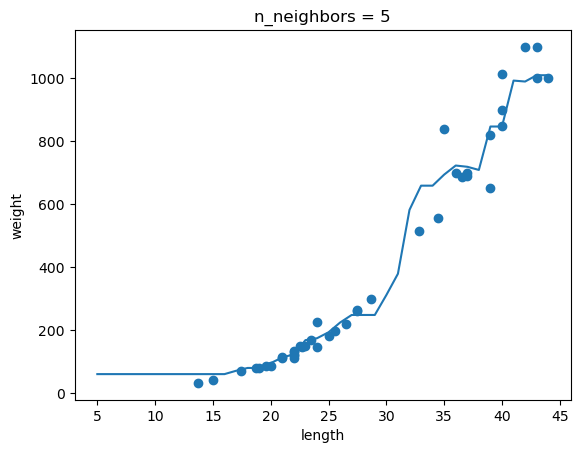

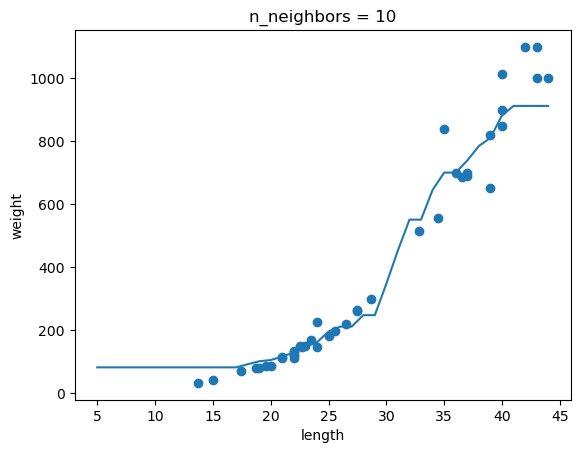

In [34]:
# k-최근접 이웃 회귀 객체를 만듭니다. 
knr = KNeighborsRegressor()     

# 5에서 45까지 x좌표를 만듭니다. 
x = np.arange(5,45).reshape(-1,1)

# n =1,5,10일 때 예측 결과를 그래프로 그립니다. 
for n in [1, 5, 10]:
    #모델훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    #지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)
    #훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()
# 이웃의 개수를 1로 하면(작을수록) 과대적합되고, 이웃의 개수를 42개로 하면(클수록) 과소적합된다. 

# 모델의 복잡도
* 모델을 복잡하게 할수록 훈련데이터에 대해 더 정확히 예측
* 그러나 너무 복잡해지면 새로운 데이터에 일반화되지 못함
* 훈련 데이터셋의 입력 데이터의 다양성과 관련
* 데이터를 더 많이 수집하고 적절하게 복잡한 모델을 만들어야 함.